In [7]:
#import all we need for now
!pip install ultralytics
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from PIL import Image
import json
import os
import yaml
import ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.4 MB/s eta 0:00:00:00:0100:01
  Attempting uninst

In [4]:
import yaml
# ====== USER CONFIG ======
train_images = "/kaggle/input/seedlings-dataset2/seedlings/images/train"     # folder with training images
val_images   = "/kaggle/input/seedlings-dataset2/seedlings/images/val"       # folder with validation images
test_images  = "/kaggle/input/seedlings-dataset2/seedlings/images/test"      # optional (set to None if unused)

# Classes (in the same order you used when generating YOLO labels)
names = ["0", "1", "2","3"]

yaml_content = {
    "train": train_images,
    "val": val_images,
    "test": test_images,  # can leave blank if unused
    "nc": len(names),   # number of classes
    "names": names
}

# ====== SAVE ======
out_file = "dataset.yaml"
with open(out_file, "w") as f:
    yaml.dump(yaml_content, f, sort_keys=False)

print(f"YOLO dataset.yaml saved at {out_file}")

YOLO dataset.yaml saved at dataset.yaml


In [5]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLO11n model
model = YOLO("yolo11n.pt")

# Train the model on the COCO8 example dataset for 100 epochs
results = model.train(data="/kaggle/working/dataset.yaml", epochs=100, imgsz=250)

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=250, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrain

train: Scanning /kaggle/input/seedlings-dataset2/seedlings/labels/train... 63 images, 0 backgrounds, 0 corrupt: 100%|██████████| 63/63 [00:00<00:00, 367.25it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/seedlings-dataset2/seedlings/labels is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 31.9±4.7 MB/s, size: 103.5 KB)


val: Scanning /kaggle/input/seedlings-dataset2/seedlings/labels/val... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<00:00, 301.14it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/seedlings-dataset2/seedlings/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.566G      2.607      4.095      1.717       1450        256: 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]

                   all         10        805    0.00816     0.0667     0.0181     0.0106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      2/100     0.754G      2.513      4.085      1.643       1428        256: 100%|██████████| 4/4 [00:00<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.74it/s]


                   all         10        805     0.0114      0.108     0.0391     0.0253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.768G       2.24      4.056      1.502       1177        256: 100%|██████████| 4/4 [00:00<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.93it/s]

                   all         10        805    0.00902     0.0917     0.0347      0.026



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.783G       2.09          4      1.373       1606        256: 100%|██████████| 4/4 [00:00<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.08it/s]

                   all         10        805    0.00926     0.0871     0.0368     0.0241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.805G      1.979      3.925      1.306       1379        256: 100%|██████████| 4/4 [00:00<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.52it/s]

                   all         10        805     0.0101      0.104     0.0615     0.0479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      0.82G      1.952      3.886      1.283       1343        256: 100%|██████████| 4/4 [00:00<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.30it/s]

                   all         10        805     0.0124      0.129      0.108     0.0954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.836G      1.906      3.832      1.251       1481        256: 100%|██████████| 4/4 [00:00<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.63it/s]

                   all         10        805     0.0127      0.142      0.126      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.848G      1.822      3.764      1.234       1043        256: 100%|██████████| 4/4 [00:00<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.91it/s]

                   all         10        805     0.0165       0.17      0.137      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.865G      1.887      3.676      1.209       1614        256: 100%|██████████| 4/4 [00:00<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]

                   all         10        805     0.0193      0.186      0.141      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.877G      1.819      3.587      1.177       1512        256: 100%|██████████| 4/4 [00:00<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.06it/s]

                   all         10        805     0.0224       0.21      0.143      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.895G      1.816      3.492      1.176       1540        256: 100%|██████████| 4/4 [00:00<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.83it/s]

                   all         10        805     0.0257      0.235       0.13     0.0856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      0.91G      1.826      3.395      1.167       1650        256: 100%|██████████| 4/4 [00:00<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 14.52it/s]

                   all         10        805     0.0291      0.245       0.14     0.0945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.924G      1.847      3.264      1.159       1334        256: 100%|██████████| 4/4 [00:00<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.15it/s]

                   all         10        805     0.0605      0.276      0.179      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.939G       1.85      3.184      1.168       1583        256: 100%|██████████| 4/4 [00:00<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.77it/s]

                   all         10        805     0.0807      0.307      0.209       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.955G      1.828      3.108      1.145       1601        256: 100%|██████████| 4/4 [00:00<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.20it/s]

                   all         10        805      0.105      0.405      0.253       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.971G      1.855      3.022      1.142       1265        256: 100%|██████████| 4/4 [00:00<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.88it/s]

                   all         10        805      0.107      0.473      0.274      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.984G      1.826      2.865      1.147       1266        256: 100%|██████████| 4/4 [00:00<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]

                   all         10        805      0.365      0.242      0.292      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.996G      1.882      2.855      1.148       1404        256: 100%|██████████| 4/4 [00:00<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.42it/s]

                   all         10        805      0.987      0.133       0.33      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.01G      1.804      2.696      1.122       1416        256: 100%|██████████| 4/4 [00:00<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.12it/s]

                   all         10        805      0.662      0.202      0.336       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.03G      1.829      2.615      1.134       1357        256: 100%|██████████| 4/4 [00:00<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 13.00it/s]

                   all         10        805      0.101      0.525      0.321      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.04G      1.848      2.506      1.144       1175        256: 100%|██████████| 4/4 [00:00<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.97it/s]

                   all         10        805     0.0977      0.484      0.298      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.05G      1.826      2.429      1.122       1561        256: 100%|██████████| 4/4 [00:00<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.69it/s]

                   all         10        805      0.104      0.512      0.309      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.07G      1.837      2.317      1.147       1190        256: 100%|██████████| 4/4 [00:00<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.75it/s]

                   all         10        805      0.358      0.307      0.331      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.09G      1.853      2.275      1.113       1743        256: 100%|██████████| 4/4 [00:00<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.81it/s]

                   all         10        805      0.415      0.343      0.373      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       1.1G      1.858      2.229      1.109       1713        256: 100%|██████████| 4/4 [00:00<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.21it/s]

                   all         10        805      0.727      0.268      0.401      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.12G      1.833      2.087      1.108       1539        256: 100%|██████████| 4/4 [00:00<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.75it/s]

                   all         10        805      0.448      0.363      0.417      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.13G      1.831      2.036        1.1       1761        256: 100%|██████████| 4/4 [00:00<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.43it/s]

                   all         10        805      0.431      0.403      0.439      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.15G      1.822      1.952      1.093       1569        256: 100%|██████████| 4/4 [00:00<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]

                   all         10        805      0.687      0.458      0.471      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.16G      1.836      1.922      1.108       1258        256: 100%|██████████| 4/4 [00:00<00:00,  9.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.34it/s]

                   all         10        805      0.751      0.484        0.5      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.17G      1.799      1.853      1.092       1500        256: 100%|██████████| 4/4 [00:00<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.45it/s]

                   all         10        805      0.764      0.469      0.505      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.19G      1.879      1.847      1.102       1397        256: 100%|██████████| 4/4 [00:00<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.27it/s]

                   all         10        805      0.739      0.475       0.48      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.21G      1.814      1.715      1.095       1411        256: 100%|██████████| 4/4 [00:00<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.86it/s]

                   all         10        805      0.789      0.422      0.473       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.22G        1.8      1.648      1.098       1512        256: 100%|██████████| 4/4 [00:00<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.93it/s]

                   all         10        805      0.792       0.44      0.485      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.23G      1.863      1.657        1.1       1547        256: 100%|██████████| 4/4 [00:00<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.05it/s]

                   all         10        805      0.774      0.461      0.485      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.25G      1.811      1.599      1.089       1346        256: 100%|██████████| 4/4 [00:00<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.95it/s]

                   all         10        805      0.778       0.48      0.484       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.26G      1.798      1.592      1.084       1679        256: 100%|██████████| 4/4 [00:00<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.09it/s]

                   all         10        805      0.808      0.465      0.485      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.28G      1.761        1.5      1.071       1619        256: 100%|██████████| 4/4 [00:00<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.67it/s]

                   all         10        805      0.809      0.477      0.498      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.29G      1.775      1.462      1.092       1482        256: 100%|██████████| 4/4 [00:00<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.11it/s]

                   all         10        805      0.836      0.441      0.502      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.31G      1.788      1.447      1.089       1510        256: 100%|██████████| 4/4 [00:00<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]

                   all         10        805      0.788      0.452      0.494      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.32G      1.845       1.51      1.096       1794        256: 100%|██████████| 4/4 [00:00<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.28it/s]

                   all         10        805      0.797      0.462      0.509       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.34G      1.808      1.462      1.078       1539        256: 100%|██████████| 4/4 [00:00<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.86it/s]

                   all         10        805       0.79      0.506      0.529      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.35G      1.756      1.399      1.073       1450        256: 100%|██████████| 4/4 [00:00<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.97it/s]

                   all         10        805      0.828      0.489      0.522       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.37G      1.821      1.393      1.093       1680        256: 100%|██████████| 4/4 [00:00<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.72it/s]

                   all         10        805       0.81      0.476      0.517      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.38G      1.726      1.344      1.065       1292        256: 100%|██████████| 4/4 [00:00<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.45it/s]

                   all         10        805      0.845       0.46      0.512      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       1.4G      1.777       1.39      1.072       1953        256: 100%|██████████| 4/4 [00:00<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.44it/s]

                   all         10        805      0.843      0.462      0.519      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.41G      1.755      1.335      1.069       1601        256: 100%|██████████| 4/4 [00:00<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.92it/s]

                   all         10        805      0.815      0.485      0.533      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.43G      1.711      1.278      1.057       1327        256: 100%|██████████| 4/4 [00:00<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.61it/s]

                   all         10        805       0.79      0.503      0.548      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.44G      1.723      1.248      1.061       1308        256: 100%|██████████| 4/4 [00:00<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.35it/s]

                   all         10        805      0.833      0.465      0.549      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.45G      1.685      1.232      1.045       1278        256: 100%|██████████| 4/4 [00:00<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.41it/s]

                   all         10        805      0.821       0.48      0.547      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.47G      1.735      1.302      1.083       1661        256: 100%|██████████| 4/4 [00:00<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.90it/s]

                   all         10        805      0.853      0.479      0.555      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.49G      1.752      1.308      1.069       1482        256: 100%|██████████| 4/4 [00:00<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.64it/s]

                   all         10        805       0.84        0.5      0.548      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100       1.5G      1.691      1.243      1.051       1646        256: 100%|██████████| 4/4 [00:00<00:00,  9.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.60it/s]

                   all         10        805      0.805      0.507      0.538      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.52G      1.714      1.248      1.054       1496        256: 100%|██████████| 4/4 [00:00<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.91it/s]

                   all         10        805      0.799      0.507       0.53      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.53G      1.682      1.195      1.055       1482        256: 100%|██████████| 4/4 [00:00<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.89it/s]

                   all         10        805      0.824      0.507      0.546      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.54G      1.642      1.157      1.063       1209        256: 100%|██████████| 4/4 [00:00<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.32it/s]

                   all         10        805       0.86      0.472      0.545      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.56G      1.663      1.175      1.054       1580        256: 100%|██████████| 4/4 [00:00<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.65it/s]

                   all         10        805      0.856      0.465      0.538      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.57G      1.667       1.18      1.051       1328        256: 100%|██████████| 4/4 [00:00<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.20it/s]

                   all         10        805       0.84      0.463      0.526      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.59G      1.644      1.147      1.049       1538        256: 100%|██████████| 4/4 [00:00<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.13it/s]

                   all         10        805      0.831      0.473      0.531      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       1.6G      1.676      1.167       1.05       1577        256: 100%|██████████| 4/4 [00:00<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.40it/s]

                   all         10        805      0.783      0.509      0.534      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.71G      1.648      1.129       1.05       1293        256: 100%|██████████| 4/4 [00:00<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.39it/s]

                   all         10        805      0.788      0.511      0.537      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.73G      1.627       1.12      1.062       1325        256: 100%|██████████| 4/4 [00:00<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.18it/s]

                   all         10        805      0.779      0.522      0.537      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.74G      1.633      1.136      1.059       1353        256: 100%|██████████| 4/4 [00:00<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.40it/s]

                   all         10        805      0.813      0.491      0.545      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.76G      1.634      1.159      1.051       1311        256: 100%|██████████| 4/4 [00:00<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.02it/s]

                   all         10        805      0.798      0.499      0.542       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.77G      1.626       1.13      1.063       1235        256: 100%|██████████| 4/4 [00:00<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.78it/s]

                   all         10        805      0.844       0.48      0.554      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.79G      1.606      1.089      1.039       1486        256: 100%|██████████| 4/4 [00:00<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.47it/s]

                   all         10        805      0.827      0.474      0.556      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       1.8G      1.659      1.144      1.061       1532        256: 100%|██████████| 4/4 [00:00<00:00, 10.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.29it/s]

                   all         10        805      0.773      0.523      0.557      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.82G      1.638      1.091      1.049       1747        256: 100%|██████████| 4/4 [00:00<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.91it/s]

                   all         10        805      0.771      0.526      0.557      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.83G      1.626      1.095      1.035       1576        256: 100%|██████████| 4/4 [00:00<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.11it/s]

                   all         10        805      0.799      0.488      0.544       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.84G      1.638      1.077      1.031       1656        256: 100%|██████████| 4/4 [00:00<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.50it/s]

                   all         10        805      0.817      0.478      0.539      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.86G      1.612      1.084      1.037       1391        256: 100%|██████████| 4/4 [00:00<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.74it/s]

                   all         10        805      0.802       0.48      0.533      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.88G      1.601      1.076      1.034       1191        256: 100%|██████████| 4/4 [00:00<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.48it/s]

                   all         10        805      0.792      0.495       0.54      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.89G      1.586      1.074      1.025       1456        256: 100%|██████████| 4/4 [00:00<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.11it/s]

                   all         10        805      0.784      0.493      0.542      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.91G      1.639       1.07      1.048       1472        256: 100%|██████████| 4/4 [00:00<00:00, 10.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.46it/s]

                   all         10        805       0.79      0.499      0.553      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.92G      1.589      1.061      1.041       1522        256: 100%|██████████| 4/4 [00:00<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.03it/s]

                   all         10        805      0.801      0.513      0.561      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.94G        1.6      1.042      1.032       1508        256: 100%|██████████| 4/4 [00:00<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.86it/s]

                   all         10        805      0.811      0.511      0.569      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.95G      1.622      1.068      1.029       1392        256: 100%|██████████| 4/4 [00:00<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]

                   all         10        805      0.809      0.502      0.566      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.96G      1.582      1.062       1.03       1395        256: 100%|██████████| 4/4 [00:00<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]

                   all         10        805      0.808      0.499      0.572      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.98G      1.607      1.031      1.044       1400        256: 100%|██████████| 4/4 [00:00<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.67it/s]

                   all         10        805      0.806      0.517      0.575      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.99G      1.568     0.9939      1.048       1196        256: 100%|██████████| 4/4 [00:00<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.91it/s]

                   all         10        805      0.826       0.51      0.578       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.01G      1.569      1.059      1.035       1627        256: 100%|██████████| 4/4 [00:00<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.89it/s]

                   all         10        805      0.827      0.502      0.572      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.03G      1.543      1.021      1.032       1498        256: 100%|██████████| 4/4 [00:00<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.72it/s]

                   all         10        805       0.83      0.504      0.576      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.04G      1.602      1.052      1.033       1548        256: 100%|██████████| 4/4 [00:00<00:00, 10.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.16it/s]

                   all         10        805      0.844      0.496       0.58      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.05G        1.6      1.049      1.024       1699        256: 100%|██████████| 4/4 [00:00<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.83it/s]

                   all         10        805      0.827      0.509       0.58      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.07G      1.562      1.026      1.028       1449        256: 100%|██████████| 4/4 [00:00<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.47it/s]

                   all         10        805      0.842      0.499      0.582      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.08G      1.577      1.028      1.037       1459        256: 100%|██████████| 4/4 [00:00<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.65it/s]

                   all         10        805      0.831      0.503      0.582      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100       2.1G      1.543      1.014      1.042       1166        256: 100%|██████████| 4/4 [00:00<00:00, 10.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.37it/s]

                   all         10        805      0.834      0.501       0.58      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.11G      1.554      1.017      1.043       1321        256: 100%|██████████| 4/4 [00:00<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]

                   all         10        805      0.841      0.484       0.58      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.12G      1.518     0.9953      1.016       1351        256: 100%|██████████| 4/4 [00:00<00:00, 10.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.79it/s]

                   all         10        805      0.842      0.484      0.579      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.14G      1.558      1.016      1.023       1570        256: 100%|██████████| 4/4 [00:00<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.34it/s]

                   all         10        805      0.823      0.509      0.581      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.15G      1.537      1.007      1.011       1553        256: 100%|██████████| 4/4 [00:00<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.58it/s]

                   all         10        805      0.819       0.51      0.579      0.362


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.17G      1.511     0.9537      1.026        877        256: 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]

                   all         10        805      0.836      0.498      0.577       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.19G      1.503     0.9389      1.035        818        256: 100%|██████████| 4/4 [00:00<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.32it/s]

                   all         10        805       0.84      0.495      0.577      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       2.2G      1.488     0.9359      1.039        834        256: 100%|██████████| 4/4 [00:00<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.57it/s]

                   all         10        805      0.596      0.539      0.576      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.21G      1.458     0.9353      1.011        792        256: 100%|██████████| 4/4 [00:00<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.08it/s]

                   all         10        805       0.84        0.5      0.577      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.23G        1.5     0.9256       1.02        983        256: 100%|██████████| 4/4 [00:00<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.15it/s]

                   all         10        805      0.846      0.504      0.574      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.24G      1.442     0.8962      1.017        990        256: 100%|██████████| 4/4 [00:00<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.14it/s]

                   all         10        805      0.603      0.512      0.575      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.26G      1.485      0.909      1.025        950        256: 100%|██████████| 4/4 [00:00<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.65it/s]

                   all         10        805      0.616      0.537      0.574       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.28G      1.461     0.9215      1.022        911        256: 100%|██████████| 4/4 [00:00<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.01it/s]

                   all         10        805      0.624      0.532      0.574      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.29G      1.464     0.9021      1.015        779        256: 100%|██████████| 4/4 [00:00<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.73it/s]

                   all         10        805      0.623      0.526      0.572      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       2.3G      1.428     0.8814      1.011        993        256: 100%|██████████| 4/4 [00:00<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.07it/s]

                   all         10        805      0.621      0.521       0.57      0.347



100 epochs completed in 0.023 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.4MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.05it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         10        805      0.818       0.51      0.579      0.362
                     0         10         30          1      0.706      0.914      0.714
                     1         10        600      0.828      0.788      0.832      0.444
                     2         10         66      0.445      0.545      0.512      0.267
                     3         10        109          1          0     0.0578     0.0228
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train3


In [8]:
!yolo detect predict model=/kaggle/working/runs/detect/train3/weights/best.pt source=/kaggle/input/seedlings-dataset2/seedlings/images/val save=True

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

image 1/10 /kaggle/input/seedlings-dataset2/seedlings/images/val/cs_s1_10_20240605.png: 256x256 3 0s, 55 1s, 9 2s, 12.9ms
image 2/10 /kaggle/input/seedlings-dataset2/seedlings/images/val/cs_s1_1_20240605.png: 256x256 4 0s, 53 1s, 6 2s, 9.2ms
image 3/10 /kaggle/input/seedlings-dataset2/seedlings/images/val/cs_s1_2_20240605.png: 256x256 2 0s, 50 1s, 7 2s, 8.2ms
image 4/10 /kaggle/input/seedlings-dataset2/seedlings/images/val/cs_s1_3_20240605.png: 256x256 1 0, 86 1s, 16 2s, 7.9ms
image 5/10 /kaggle/input/seedlings-dataset2/seedlings/images/val/cs_s1_4_20240605.png: 256x256 1 0, 47 1s, 12 2s, 7.9ms
image 6/10 /kaggle/input/seedlings-dataset2/seedlings/images/val/cs_s1_5_20240605.png: 256x256 2 0s, 10 1s, 10 2s, 8.0ms
image 7/10 /kaggle/input/seedlings-dataset2/seedlings/images/val/cs_s1_6_20240605.png: 256x256 3 0s, 58 1s, 6 

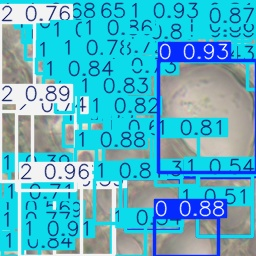

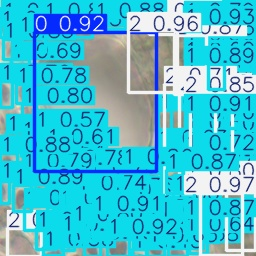

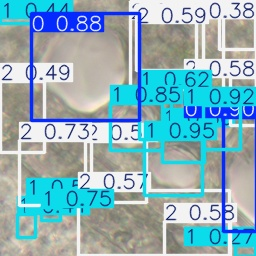

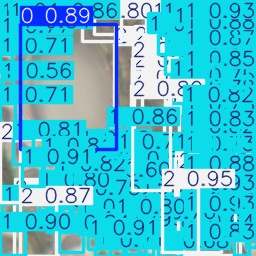

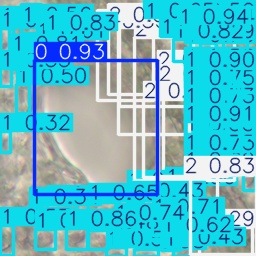

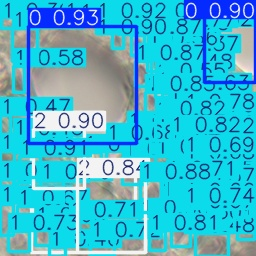

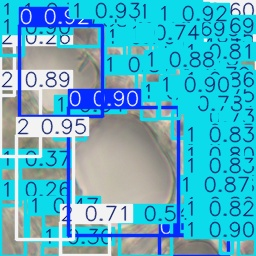

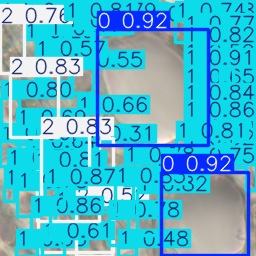

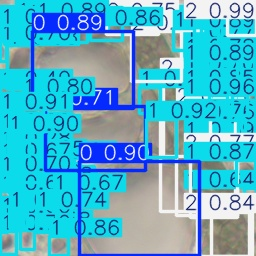

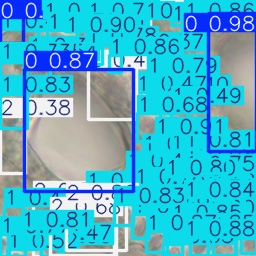

In [9]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')